In [1]:
from pandas import read_csv
import numpy as np
#from keras.saving import load_model
import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,GRU,LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [2]:
itxt="5.txt"
with open(itxt,"r") as f:
    datalist = f.readlines()
print(datalist[0:4],len(datalist))
datanp=np.zeros((19997,11))
print(datanp.shape,len(datalist))

['1670.05\t0\t0\t0\t0\t68.585\t0\t0\t36.36\t-11.32\t-88.09\t0\n', '1670.06\t0\t0\t0\t0\t68.585\t0\t0\t36.36\t-11.32\t-88.08\t0\n', '1670.07\t0\t0\t0\t0\t68.585\t0\t0\t36.36\t-11.32\t-88.07\t0\n', '1670.08\t0\t0\t0\t0\t68.585\t0\t0\t36.36\t-11.32\t-88.07\t0\n'] 19997
(19997, 11) 19997


In [3]:
itxt1="7.txt"
with open(itxt1,"r") as f:
    datalist1 = f.readlines()
print(datalist1[0:4],len(datalist1))
datanp1=np.zeros((15991,11))
datalist1=datalist1
print(datanp1.shape,len(datalist1))

['880.11\t0\t0\t0\t0\t67.8328125\t0\t0\t36.51\t-11.24690476\t-89.22\t0\n', '880.12\t0\t0\t0\t0\t67.8328125\t0\t0\t36.51\t-11.24928571\t-89.22\t0\n', '880.13\t0\t0\t0\t0\t67.8328125\t0\t0\t36.51\t-11.25\t-89.22\t0\n', '880.14\t0\t0\t0\t0\t67.8328125\t0\t0\t36.51\t-11.25\t-89.22\t0\n'] 15991
(15991, 11) 15991


In [4]:
count=0
for i in datalist:
    datai=i.split("\n")[0].split("\t")
    #print(datai)
    for j in range(11):
        #print(j)
        datanp[count:count+1,j]=float(datai[j])
    count=count+1
print(datanp[0:3,:],datanp.shape)

[[1670.05     0.       0.       0.       0.      68.585    0.       0.
    36.36   -11.32   -88.09 ]
 [1670.06     0.       0.       0.       0.      68.585    0.       0.
    36.36   -11.32   -88.08 ]
 [1670.07     0.       0.       0.       0.      68.585    0.       0.
    36.36   -11.32   -88.07 ]] (19997, 11)


In [5]:
count1=0
for i in datalist1:
    datai=i.split("\n")[0].split("\t")
    #print(datai)
    for j in range(11):
        #print(j)
        datanp1[count1:count1+1,j]=float(datai[j])
    count1=count1+1
print(datanp1[0:3,:],datanp1.shape)

[[880.11         0.           0.           0.           0.
   67.8328125    0.           0.          36.51       -11.24690476
  -89.22      ]
 [880.12         0.           0.           0.           0.
   67.8328125    0.           0.          36.51       -11.24928571
  -89.22      ]
 [880.13         0.           0.           0.           0.
   67.8328125    0.           0.          36.51       -11.25
  -89.22      ]] (15991, 11)


In [7]:
#n = datanp.shape[0]
#split = int(n*0.8)
train_data = datanp#[range(split),:]
test_data = datanp1#[split:,:]
print(train_data.shape,train_data[0:1,:])

(19997, 11) [[1670.05     0.       0.       0.       0.      68.585    0.       0.
    36.36   -11.32   -88.09 ]]


In [6]:
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, dat.shape[0], time_steps)
    Y = dat[Y_ind,:]
    # Prepare X
    rows_x = Y.shape[0]
    X = dat[range(time_steps*rows_x),:]
    X = np.reshape(X, (rows_x, time_steps, 11))    
    return X, Y

In [8]:
time_steps = 1
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)
print(trainX.shape,trainY.shape)
print(testX.shape,testY.shape)

(19996, 1, 11) (19996, 11)
(15990, 1, 11) (15990, 11)


In [9]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units[0], activation=activation[1]))
    model.add(Dense(units=dense_units[1], activation=activation[2]))
    model.add(Dense(units=dense_units[2], activation=activation[3]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
#model = create_RNN(hidden_units=100, dense_units=[50,50,1], input_shape=(time_steps,4), activation=['tanh', 'tanh','tanh', 'linear'])
model = create_RNN(hidden_units=100, dense_units=[50,50,1], input_shape=(time_steps,4), activation=['relu', 'relu','relu','linear'])


In [9]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    #model.add(GRU(hidden_units, input_shape=input_shape, activation=activation[0]))
    #model.add(LSTM(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units[0], activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
model = create_RNN(hidden_units=200, dense_units=[1], input_shape=(time_steps,4), activation=['relu', 'linear']) #'linear'])
#model = create_RNN(hidden_units=100, dense_units=[50,50,1], input_shape=(time_steps,4), activation=['relu', 'relu','relu','linear'])

In [103]:
#print(trainX[:,:,1:5])
print(trainY[:,5:6])

[[68.585   ]
 [68.585   ]
 [68.585   ]
 ...
 [75.599375]
 [75.599375]
 [75.599375]]


In [10]:
#model.fit(trainX[:,:,1:5], trainY[:,5],validation_data=(testX[:,:,1:5], testY[:,5]), epochs=100, batch_size=1, verbose=2)
model.fit(trainX[:,:,1:5], trainY[:,6:7],validation_data=(testX[:,:,1:5], testY[:,6:7]), epochs=100)
#model.fit(trainX[:,:,1:5], trainY[:,5:6],validation_data=(testX[:,:,1:5], testY[:,5:6]), epochs=100)

Epoch 1/100
625/625 [==============================] - 7s 7ms/step - loss: 20.9371 - val_loss: 11.0550
Epoch 2/100
625/625 [==============================] - 6s 9ms/step - loss: 11.0363 - val_loss: 10.0374
Epoch 3/100
625/625 [==============================] - 5s 9ms/step - loss: 10.5996 - val_loss: 10.0182
Epoch 4/100
599/625 [===========================>..] - ETA: 0s - loss: 10.7068

KeyboardInterrupt: 

500/500 [==============================] - 2s 4ms/step


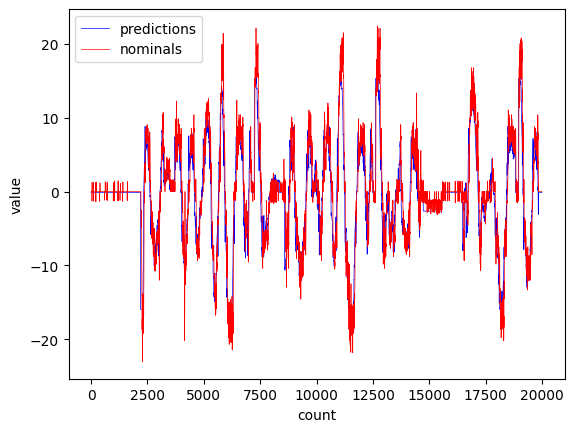

In [11]:
train_predict = model.predict(trainX[:,:,1:5])
test_predict = model.predict(testX[:,:,1:5])
t=range(train_predict.shape[0])
plt.figure()
plt.plot(t,train_predict, color='blue', marker=' ', linestyle='solid',linewidth=0.5, markersize=5,label="predictions")
plt.plot(t,trainY[:,6:7], color='red', marker=' ', linestyle='solid',linewidth=0.5, markersize=5, label="nominals")
plt.legend(loc='best')
plt.xlabel("count")
plt.ylabel("value")
#plt.yscale("log")
pngf="test.pdf"
plt.savefig(pngf, dpi=500)

In [11]:
model.save("rnn1t.keras")
#loaded_model = load_model("model4p5.keras")
#train_predict=loaded_model.predict(trainX[:,:,1:5])

In [61]:
print(trainX[:,:,1:5].shape)

(999, 20, 4)


In [20]:
print(train_predict.shape)
cang=np.cumsum(train_predict)
print(cang.shape)
ang=trainY[:,5]
print(ang.shape,ang[0])
iang=ang[0]+cang*0.2
print(iang.shape)
#print(ang)
#print(iang)

(999, 1)
(999,)
(999,) 68.585
(999,)


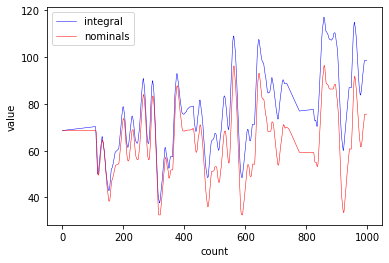

In [13]:
t=range(ang.shape[0])
plt.figure()
plt.plot(t,iang, color='blue', marker=' ', linestyle='solid',linewidth=0.5, markersize=5,label="integral")
plt.plot(t,ang, color='red', marker=' ', linestyle='solid',linewidth=0.5, markersize=5, label="nominals")
plt.legend(loc='best')
plt.xlabel("count")
plt.ylabel("value")
#plt.yscale("log")
pngf="anglettt.pdf"
plt.savefig(pngf, dpi=500)

(999,) (999,) (999,)


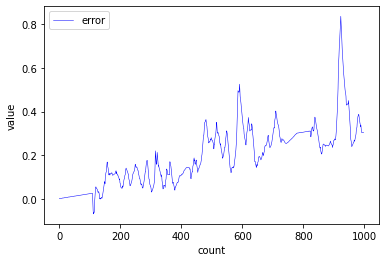

In [26]:
a=(iang-ang)/ang
print(iang.shape,ang.shape,a.shape)
#print(a)
t=range(ang.shape[0])
plt.figure()
plt.plot(t,a, color='blue', marker=' ', linestyle='solid',linewidth=0.5, markersize=5,label="error")
plt.legend(loc='best')
plt.xlabel("count")
plt.ylabel("value")
#plt.yscale("log")
pngf="angleeee.pdf"
plt.savefig(pngf, dpi=500)

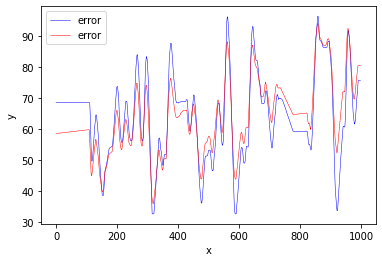

In [32]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * x + b
popt, pcov = curve_fit(func, iang, ang)
plt.plot(t,ang, color='blue', marker=' ', linestyle='solid',linewidth=0.5, markersize=5,label="error")
plt.plot(t,func(iang, *popt), color='red', marker=' ', linestyle='solid',linewidth=0.5, markersize=5,label="error")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()